In [65]:
!python --version

Python 3.12.3


In [67]:
!pip install tensorflow

# $\textbf{Theory and code for Sklearn's Perceptron}$

In [217]:
"""For the Deep Learning using TensorFlow and Keras course;
   Author: Arta Khosravi
   Sept & Oct. 2025""";

## Some theory:

- In NR and this course, we currently consider 3 gates:
  1) Identification, or C = A
  2) AND gate: C = A and B
  3) NOT gate: C = A and Not B

- One should be familiar with Summation and Step function. A perceptron, known as Threshold Logic Unit (TLU), gathers and calculates a weighted summation of inputs, and processes the results by a step function, later producing the final output. Thus, a fundanmental knowledge of summation and step function is necessary.
  
- $Summation: w_1x_1+w_2x_2+... = \sum w_ix_i = x^Tw$

- $
\begin{align}
    Types\;of\;Step\;Function =
\left\{
  \begin{array}{ll}
    1) \ \text{Heaviside}(x): 
    \left\{
      \begin{array}{ll} 
        0, & x < 0, \\
        1, & \text{otherwise}.
      \end{array}  
    \right. \\[1em]
    2) \ \text{Sgn}(x): 
    \left\{
      \begin{array}{ll} 
        -1, & x < 0, \\
        0,  & x = 0, \\
        +1, & x > 0. 
      \end{array}  
    \right.
  \end{array}
\right.
\end{align}
$

- Simple binary classifier : TLU/LTU
- To solve a simple binary Classification problem using TLU: results will show if they were higher than "X", they'll be in 'Class 1', and if lower, 'Class 2.'
- Our algorithm has to learn the $w_i$ parameters, or weight.
- Perceptron: a combination of TLUs. They have summation & step function.
- TLU/LTU is connected of each of the inputs: Thus, being called a "Fully Connected Network." In this case, "Fully Connected Layer," or "Dense Layer."

- If we have 3 TLUs, we have 3 summation/step-function for each, and 3 outputs accordingly.
- We consider 2 inputs, or 2 input neurons.
- The total inputs are considered the input layer; and the total outputs, the output layer.
- The "Fully connected layer" makes sense here, as all the inputs of each layer is connected to each of the outputs in the output layer.
- It is important to note, that we will always add a "Bias" input, which will always have the value of $1,$ or $x_{bias} = 1.$
- Assume it similar to an inner product. Considering a very simple example of a classification, $y = wx + b$, the $x$ value of the $b$ parameter has the value of $1,$ so the final equation shortens to: $y = \theta x,$ with $\theta = [w,b],$ and $x = \begin{bmatrix}x_1 & 1 \\ x_2 & 1 \\ . & 1 \\ . & 1 \\ x_n & 1\end{bmatrix}.$
- The final output of the Perceptron, will be shown with $h_\theta(x),$ as shown below:
  $h_\theta(x) = activation\_function(xw + b),$ with $x$ being the matrix of features.
  <br>

<br>
$\textbf{EX:}$ Imagive you have four features, and want to predict the price of a house.

| Metric ($m^2$) | # | Year | Location | Price ($)
| --- | --- | --- | --- | --- |
| --- | --- | --- | --- | --- |
| --- | --- | --- | --- | --- |

- $x:$ Matrix of features: `x.shape() = (1000,4)`
<br>
- $w:$ Matrix of weights: which means the summation of neaurons of each layer; in this case, the number of inputs added to the number of outputs in the other layer. Here, we have 4 inputs and 1 output (price): `w.shape() = (4,1)`
    - Since we are applying a matrix product, the output is presented to be a numpy array or matrix with: (1000,4)x(4,1) = (1000,1)
- $b:$ Bias vector: Shape of intercept: `b.shape() = (1,1)`: Using the broadcasting rule, the (n,1) shape of b can be changed to (n,n).

-----

$\textbf{Perceptrons}:$
- To calculate the Perceptron, we will use a method called "The organization of Behavior," done by Donald Hebb, thus being called "Hebb's rule," or "Hebbian Learning." Perceptrons use such rule to find the parameters and weights. They must be found in a way to decrease the error as much as possible.
- Explanation: When a biological neuron, sends an electric signal to the other neuron, the connection between them increases: "Cells that fire toghether, wire together." The final equation is defined as:<br>
  $\textbf{Perceptron\;Convergence\;Theorem}$: $\Delta w = - \eta \frac{dE}{dw},$ $\rightarrow$ If the model is linearly seperable, Perceptron is entirely able to find it. <br>
  $W^{next\;step}_{j,i} = W^{step} + \eta(y_i - \hat{y_i})x_j.$ $\rightarrow$ The calculated error helps to update the weight of next steps and so on. It continues in a loop until our prediction and true value are identical.<br>
  Where $i$: Output, $j$: Input, $y_i$: True Value (Target), $\hat{y_i}$: Predicted Value, $x_j$: Current Input Value, $\eta$: Learning Rate, $W$: weights.

---------

# Working with Perceptron, using the Iris dataset

## Importing the required libraries

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy as sp
import pandas as pd
import math
from sklearn.datasets import load_iris #the iris flower which differs in the size of its petals and sepals, has 3 class, 4 features, and 150 samples
from sklearn.linear_model import Perceptron

## Importing the dataset

In [202]:
iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [210]:
X = iris_data.data #returns a numpy array, it is our input
y = iris_data.target
#I want the Perceptron to only be faced with a binary problem, for example as in only 0. thus:
y = y == 0
y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [228]:
X.shape #Perceptron's weight are in coef_. in here, it's as if we have 4 neurons here (input), and output is 1 neuron.

(150, 4)

## Considering the Perceptron

In [220]:
perceptron = Perceptron()
perceptron.fit(X,y)

Perceptron()

In [222]:
perceptron.score(X,y) #logical to give 100%, it's our own classification model

1.0

## Our coefficients and intercept

In [232]:
#our coefficients (w) will be as shown in the output
perceptron.coef_, perceptron.coef_.shape #the shape is (1,n_features) so with having four features, it's (1,4)

(array([[ 2.2,  4.4, -6.9, -3.5]]), (1, 4))

In [234]:
#our intercept (b) will be as shown in the output
perceptron.intercept_

array([1.])

## Considering an output with more than 2 classes

In [238]:
#If our problem was general and not binary, then:
X = iris_data.data #returns a numpy array, it is our input
y_new = iris_data.target
# y = y == 0
y_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [240]:
perceptron_new = Perceptron()
perceptron_new.fit(X,y_new)

Perceptron()

In [265]:
perceptron_new.score(X,y_new)

0.48

In [246]:
perceptron_new.coef_, perceptron_new.coef_.shape,
#the reason for our matrix being shaped as ('3',4) now, is that we have now 3 neurons as output.
#previously, for our binary problem, output or 'y' was binary with only output being valued '0.'
#in Sklearn.linear_model_perception, in the "coef_" arguement, if the number of classes are equal to or higher than 2, then the
#shape of coefficients will be in the (number of classes, number of features) format.
#Which, previously stated, our data has 3 classes of different irises (being 0, 1, 2).

(array([[  1.9,   6. ,  -8.8,  -3.9],
        [ 18.7, -27.6,  11.2, -24.1],
        [-37.4, -29.2,  52.6,  54.5]]),
 (3, 4))

In [248]:
perceptron_new.intercept_, perceptron_new.intercept_.shape #same goes for intercept, having 3 outputs or 3 neurons.

(array([  1.,  16., -22.]), (3,))

----------

## $\textbf{XOR (Exclusive OR) problem}$

- Imagining a problem as below, with the two squares being in the same family and the two "x"s being in the same family, the Perceptron cannot solve such a problem, because:

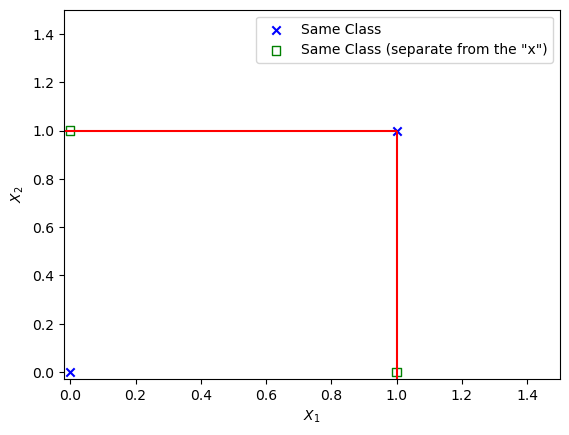

In [512]:
plt.axvline(x=1,ymin=0, ymax=0.67,c='r')
plt.axhline(y=1,xmin=0, xmax=0.67,c='r')
plt.scatter([1,0],[1,0],marker='x',c='b',label='Same Class')
plt.scatter([1,0],[0,1],marker='s',edgecolors='g',facecolors='none',
            label='Same Class (separate from the "x")')
plt.xlim(-0.02,1.5); plt.ylim(-.03,1.5)
plt.xlabel('$X_1$'); plt.ylabel('$X_2$')
plt.legend(); plt.show()

- If we built two models or two Perceptrons for these families, such that the two $X_1$ and $X_2$ are entered as seperate inputs, and have them reached their seperate TLUs; the question is what will the output be?
- What we can do, is to produce a line with the Perceptron to seperate the 'x's from 'squares' and so on:

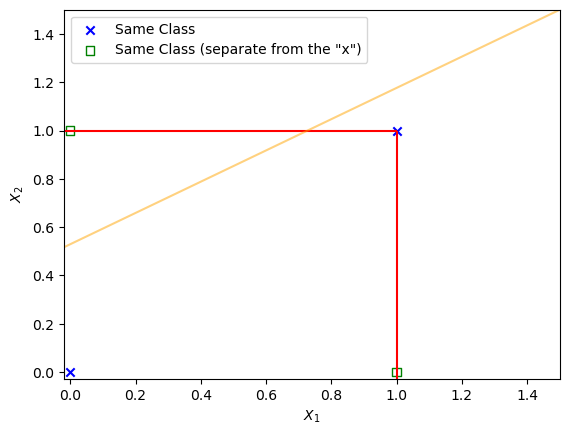

In [508]:
plt.axvline(x=1,ymin=0, ymax=0.67,c='r')
plt.axhline(y=1,xmin=0, xmax=0.67,c='r')
plt.scatter([1,0],[1,0],marker='x',c='b',label='Same Class')
plt.scatter([1,0],[0,1],marker='s',edgecolors='g',facecolors='none',
            label='Same Class (separate from the "x")')
plt.plot([-0.2,1.5],[0.4,1.5],c='orange',alpha=0.5)
plt.xlim(-0.02,1.5); plt.ylim(-.03,1.5)
plt.xlabel('$X_1$'); plt.ylabel('$X_2$')
plt.legend(); plt.show()

- It is obvious such a line isn't working correctly, since it only seperated only one square. Another line below can seperate the "x"s, but it cannot predict/seperate the ss as correctly. So what is the solution?

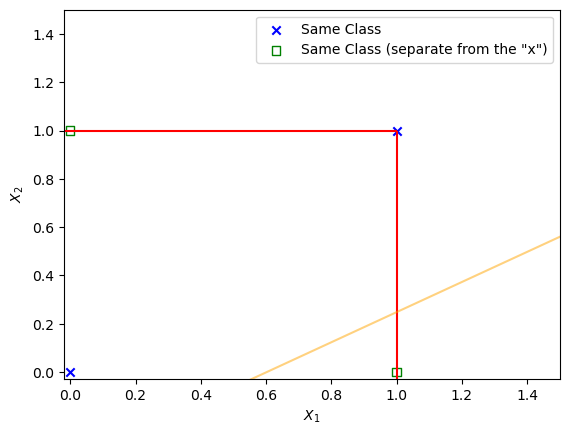

In [506]:
plt.axvline(x=1,ymin=0, ymax=0.67,c='r')
plt.axhline(y=1,xmin=0, xmax=0.67,c='r')
plt.scatter([1,0],[1,0],marker='x',c='b',label='Same Class')
plt.scatter([1,0],[0,1],marker='s',edgecolors='g',facecolors='none',
            label='Same Class (separate from the "x")')
plt.plot([-0.2,1.5],[-0.5,0.56],c='orange',alpha=0.5)
plt.xlim(-0.02,1.5); plt.ylim(-.03,1.5)
plt.xlabel('$X_1$'); plt.ylabel('$X_2$')
plt.legend(); plt.show()

- The solution lies in Spacking Perceptrons, or $\textbf{"Multilayer Perceptrons."}$ Meaning, we will add another layer to the Perceptrons, and produce outputs again.
- We will consider this line of logic: If our data/input, is lower than the minimum value line, or is greater than the maximum value line, then it will be called "Class 1," for example. Otherwise, consider it "Class 0."
- This network is also called $\textbf{"FeedForward Neural Network,"}$ or $\textbf{FNN}$.
- When we increase the amount of Hidden layers (2+), it is called "Deep."

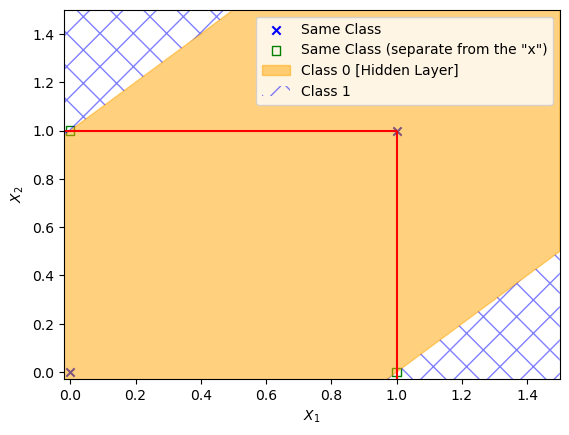

In [517]:
plt.axvline(x=1,ymin=0, ymax=0.67,c='r')
plt.axhline(y=1,xmin=0, xmax=0.67,c='r')
plt.scatter([1,0],[1,0],marker='x',c='b',label='Same Class')
plt.scatter([1,0],[0,1],marker='s',edgecolors='g',facecolors='none',
            label='Same Class (separate from the "x")')
plt.fill_between([-2,1.5],[-3,0.5], [-1,2.5],alpha=0.5,color='orange',label = 'Class 0 [Hidden Layer]')
plt.fill_between([-2,1.5],plt.ylim()[0],[-3,0.5],color="none",hatch="X",ec="b",lw=0,alpha=0.5,label = 'Class 1')
plt.fill_between([-2,1.5],[-1,2.5],plt.ylim()[1],color="none",hatch="X",ec="b",lw=0,alpha=0.5)
plt.xlim(-0.02,1.5); plt.ylim(-.03,1.5)
plt.xlabel('$X_1$'); plt.ylabel('$X_2$')
plt.legend(); plt.show()

- Back to the main issue, our problem lied in coverging the inputs. The solution was found in a technique called "Automatich Differentiation," or "Autodiff." In short, the calculations involve using the Gradiant descent (mentioned in the ML file):
  #### $E(w) = \frac{1}{2} \sum\limits_{k=1}^n\sum\limits_{i} [t_i^k - \hat{y^k_i}] : [1] $
- Anywhere $W_{ij}^{(n)}$ was mentioned, in a fully connected network with a flow of inputs towards the outputs, it means the weight is connecting the previous layer to the latter one. In other words:<br>
  - $W_{ij}^{(n)}$: "The weight that is connecting the $j$th neuron, from the $(n-1)$th layer, to the $i$th neuron, from the $n$th layer."
  - j: previous layer; i: upper layer; n: upper layer; n-1: previous layer. Usually, layers start from 0 and neurons start from 1.
  - For example, consider we have 5 inputs ($x_1, x_2, x_3, x_4, x_5$), 4 layers (layer 0, 1, 2, 3), and 3 outputs ($\hat{y^1_1}, \hat{y^q_2}, \hat{y^q_3}$).
      - The weight that is connecting Neuron 1 from layer 0 to Neuron 2 from layer 1, is $W_{21}^{(1)}.$
      - The weight that is connecting Neuron 2 from layer 1 to Neuron 2 from layer 2, is $W_{22}^{(2)}.$
      - The weight that is connecting Neuron 2 from layer 2 to Neuron 3 from layer 3, is $W_{32}^{(3)}.$
- Further, we must calculate the mentioned Error for each weight, gain the differentiates, and update the result for each weight seperately.
  <br>Meaning that for any $j$ neuron from the $n-1$th layer, to any $i$ neuron to the $n$th layer, we will have:
<!-- <br> -->
  #### $\Delta w^{(n)}_{ij} = -\gamma \frac{dE}{dw^{(n)}_{ij}} : [2]$
- Note that for future complicated problems, we might have both global and local uptimum, so it might not take only a few iterations. Although the number of global uptimums are much larger, so the possibility of not landing on one is small. Overall, the most definition of the equation is to differentiate so much so that the weight changes no longer, or the algorithm is convergent.
- So, the differentiation of the E(w) in respect to weights, should be applied. Weights are included in the predicition parameter, or $\hat{y^k_i}.$
- [3] : To calculate the outputs, for example $\hat{y}_1^q$, all of the weights of the previous layer are to be applied for this output. So it's still the same $w*x$. Since it's applied on all the neurons of the previous layer, then it's obviously a summation. Further, for the $\hat{y}_1^q$, we will have the weight coming from neurons 1, 2, 3 of the layer (2), so the weight coming from the first neuron is $W_{11}^{(3)}$, and the input neuron (first neuron of layer (2)) is $x_1^{(2)}$. So overall, $x_j^{(2)}$, and $w_{i j}^{(3)}$. Also, we might not use this result at the final layer; we want to limit it to our desired output. So we will need an $\textbf{activtion function}$ $(a f^{(i)})$, which is dependant on each layer. So, the "w"s (only for this layer) have been found so we can apply Eq. [2] accordingly. But, Eq. [3] is still unclear because we don't know $x_j^{(2)}$ yet, which is predicted from previous layers. Thus:
- [4]: It's very much similar to [3], only this time our variable is $x$. Our unknown variable, instead of $x_j^{(2)}$ in [3], is $x_k^{(1)}$, which are the input neurons of the layer (1). Hence:
- [5]: Similar to [3] and [4], $x_l^{(0)}$ are the neurons of the original input layer.
### $
\begin{aligned}
\left\{\begin{array}{ll}
\hat{y}_i^q=a f^{(3)}\left(\sum_j w_{i j}^{(3)} x_j^{(2)}\right): [3]\\
x_j^{(2)}=a f^{(2)}\left(\sum_k w_{j k}^{(2)} x_k^{(1)}\right): [4] \\
x_k^{(1)}=a f^{(1)}\left(\sum_l w_{k l}^{(1)} x_l^{(0)}\right): [5] \\
\end{array}\right.
\end{aligned}
$

- With the layers increasing, $back propagation$ algorithm comes in play.

# Backpropagation Algorithm Introduction:

First, a few varibles are to be defined:

- #### $x_i^{(n)}$: Neuron output
- #### $\beta_i^{(n)}$: Drive of neuron (activation of neuron)
     #### $\rightarrow \beta_i^{(n)} = \sum\limits_{l} [w_{i l}^{(n)} x_l^{(n-1)}] = \sum\limits_{l} [w_{i l}^{(n)} a f^{(1)}(\beta_l^{(n-1)})]$
     ##### $\rightarrow e.g: \beta_1^{(2)} = w_{11}^{(2)}x_1^{(1)} + w_{12}^{(2)}x_2^{(1)} + w_{13}^{(2)}x_3^{(1)}$
     #### $\rightarrow \frac{d\beta_1^{(2)}}{dw_{11}^{(2)}} = x_1^{(1)} \rightarrow \frac{d\beta^{(n)}_{i}}{dw^{(n)}_{ij}} = x_j^{(n-1)}$
- ### $\delta_k^{(n)} = \frac{dE}{d\beta^{(n)}_{k}}$
Further, coefficients (weights) are to be updated:
- ### $\Delta w^{(n)}_{ij} = -\gamma \frac{dE}{dw^{(n)}_{ij}} = - \gamma \frac{dE}{d\beta^{(n)}_{i}}\frac{d\beta^{(n)}_{i}}{dw^{(n)}_{ij}} $
  #### $\rightarrow \boxed{\Delta w^{(n)}_{ij} = -\gamma\delta_i^{(n)}x_j^{(n-1)}} \rightarrow \delta_i^{(n)} \propto \delta_i^{(n-1)}$
Next, Affinity Graph is to be introduced:
- ### $\delta_3^{(2)} = \frac{dE}{d\beta^{(2)}_{3}} = \sum\limits_{j}\frac{dE}{d\beta^{(3)}_{j}}\frac{d\beta^{(3)}_{j}}{d\beta^{(2)}_{3}}$
  #### $\hspace{1cm} = \sum\limits_{j}\delta_j^{(3)}w_{j3}^{(3)}(af)'$
  ##### $\rightarrow e.g. : \beta_1^{(3)} =  w_{11}^{(3)}af^{(2)}(\beta_1^{(2)}) + w_{12}^{(3)}af^{(2)}(\beta_2^{(2)}) +  ...$
  #### $\rightarrow \frac{d\beta_1^{(3)}}{d\beta_2^{(2)}} = w_{12}^{(3)}(af^{(2)})'$
  ### $\rightarrow$ Affinity Graph: $\boxed{\delta_k^{(n-1)} = \sum\limits_{j}\delta_j^{(n)}w_{jk}^{(n)}(af)'}$

## So in general: what is the Backpropagation Algorithm:

- Initializing the weight values
- Choosing data ($x^q$): Input = $x^{(0)}_k = x^q_k$
- Publishing the information onto the top of the network (last layer):
  #### $x_j^{(n)} = a f^{(n)}(\beta_j)$
  #### $\hspace{1cm} = a f^{(n)}\sum\limits_{k}w_{jk}^{(n)}x_{k}^{(n-1)}$
  #### $\hspace{1cm} \rightarrow Output: \hat{y}_i^q = x_i^{(last\ layer)}$
- Calculating the Error of the output:
  #### $\delta_i^{(last\ layer)} = af(\beta_i^{(last\ layer)})'[\hat{y_i}^q - t_i^q]$
- Publishing the Error of the return path:
  #### $\delta_i^{(n)} \rightarrow \delta_i^{(n-1)}$
  #### $\delta_i^{(n-1)} = af(\beta_i^{(n-1)})'\sum\limits_{i} w_{ij}^{(n)} \delta_i^{(n)}$
- Updating the coefficients (weights):
  #### $\Delta w_{ij}^{(n)} = -\gamma \delta_i^{(n)} x_j^{(n-1)}$
- Return to the first step.

### Activation function examples:

- ### $\sigma(t) = \frac{1}{1+e^{-t}}$

- #### $
\begin{align}
    \hat{y} =
\left\{
      \begin{array}{ll} 
        0, &\sigma(t) < 0.5, \\
        1, &\sigma(t) \geq 0.5.
      \end{array}  
    \right. \\[1em]
\end{align}
$
- #### Softmax: $ S(t_i) = \frac{e^{t_i}}{\sum\limits_{i=1}^{n}e^{t_i}}$

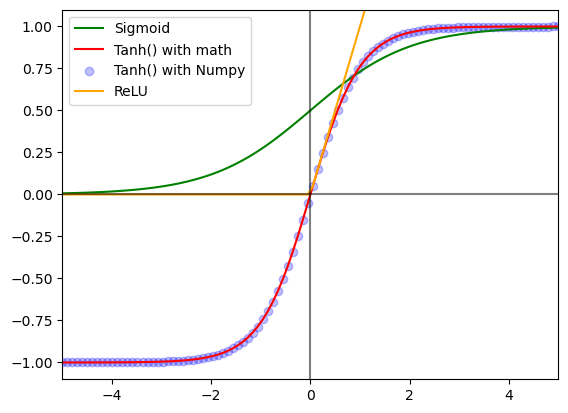

In [128]:
#Important note: since we use the gradiant of activation functions to calculate the errors (\delta), it is important that-
#-their input won't equal to zero.
x = np.linspace(-5,5,100)
y = []
relu_list = []
""""""
#1) Sigmoid
def Sigmoid(z): 
    return 1/(1+np.exp(-z))
""""""
#2) Tanh()
for i in range(len(x)): 
    y.append(math.tanh(x[i])) 
    i += 1
""""""
#3) ReLU (Rectified Linear Unit function): max(0,x)
def ReLU(z): 
    if z > 0:
        return z
    else:
        return 0
#or : #def ReLU(z): return max(0,z)
for i in range(len(x)): 
    relu_list.append(ReLU(x[i])) 
    i += 1
""""""
plt.plot(x,Sigmoid(x),color='g',label = 'Sigmoid')
plt.plot(x,y,color='red',label = 'Tanh() with math')
plt.scatter(x,np.tanh(x),color='b',label = 'Tanh() with Numpy',alpha=0.25)
plt.plot(x,relu_list,c='orange',label='ReLU')
plt.plot([-7,7],[0,0],c='black',alpha=0.5)
plt.plot([0,0],[-1.2,1.2],c='black',alpha=0.5)
plt.xlim(-5,5)
plt.ylim(-1.1,1.1)
plt.legend()
plt.show()

# Cross Entropy:
- Categorical Cross-Entropy $\rightarrow$ Label one-hot $\rightarrow$ arrays: [1,0,0,0], ..., [0,0,0,1]
- Sprase Categorical Cross-Entropy $\rightarrow$ Label Integer Encoded $\rightarrow$ [3] [0]
- Entropy: $H(x) = -\sum\limits_{x}P(x)log_2P(x)$
### Cross Entropy Loss:
- #### N class: $L_{CE} = -\sum\limits_{i=1}^{n}t_ilog(P_i) \rightarrow t_i = real\;label, P_i = Softmax$

- #### Binary Classification: $L_{CE} = -[tlog(P) + (1-t)log(1-P)] \rightarrow$ Since their sum should always be 1.

-----------------